# Linear Regression with One Variable

Here we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

The file ex1data1.txt (available under week 2's assignment material) contains the dataset for our linear regression exercise. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
data = pd.read_csv('ex1data1.txt', header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


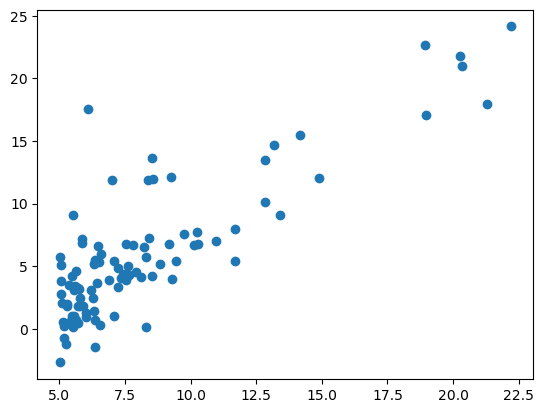

In [157]:
plt.scatter(X, y)
#plt.xlabel("Population of the City in 10,000")
#plt.ylabel("Profit in $10,000s")
plt.show()

# Adding the intercept term

In [158]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term

C:\Users\klikh\AppData\Local\Temp\ipykernel_11792\351318876.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]
C:\Users\klikh\AppData\Local\Temp\ipykernel_11792\351318876.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [159]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# Computing the cost

In [160]:
#computing cost
def computeCost(X,y,theta):
    y_pred=np.dot(X,theta)
    mse=(y_pred-y)**2
    return (1/(2*m)) * np.sum(mse)


In [161]:
J=computeCost(X,y,theta)
print(J)

32.072733877455676


# Finding the optimal parameters using Gradient Descent

In [162]:
#compoute gradient descetn
def gradientDescentUnivariate(X,y,theta,alpha,iterations):
    m=len(y)
    J_history=[]
    for i in range(iterations):
        y_pred=np.dot(X,theta)
        error=np.dot(X.transpose(),(y_pred-y))
        descent=alpha*1/m *error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    return theta, J_history
theta,J_history=gradientDescentUnivariate(X,y,theta,alpha,iterations)
print("h(x) = "+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"X1")

h(x) = -3.63 + 1.17X1


In [163]:
#checking the cost values with new theta values
J=computeCost(X,y,theta)
print(J)

4.483388256587725


In [164]:
#we already have a vector of all the cost values throught the history
print(J_history[-1])

4.483388256587725


# 3D diagram for a univariate linear regression
the cost function is a convex function

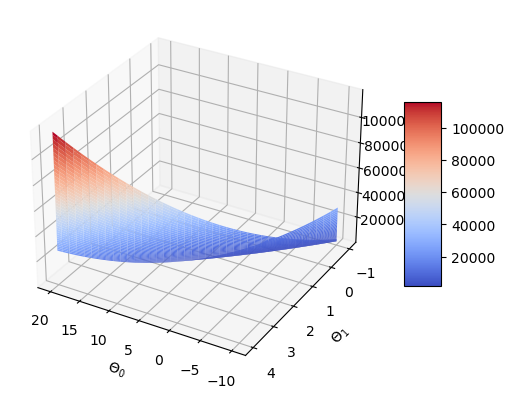

In [165]:
#3d diagram for genrating new theta values and corresponding cost values
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,20,120)
theta1_vals=np.linspace(-1,4,120)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

# Cost function observation w.r.t number of iteration

Text(0.5, 1.0, 'cost func using  GD ')

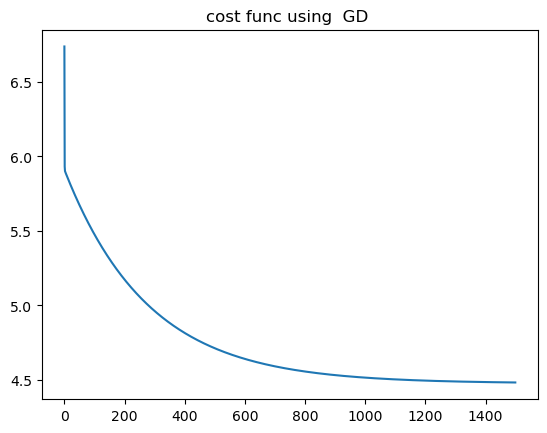

In [166]:
plt.plot(J_history)
plt.title("cost func using  GD ")

Plotting the cost function against the number of iterations gave a nice descending trend, indicating that the gradient descent implementation works in reducing the cost function

# Plot showing the best fit line

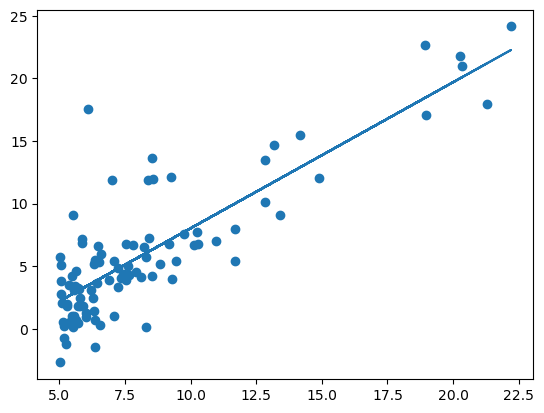

In [167]:
# plot to show the best fit line
plt.scatter(X[:,1],y)
plt.xlabel=("populaions of the city in 10000s")
plt.ylabel=("profit in $10000s")
plt.plot(X[:,1],np.dot(X,theta))
plt.show()

# make prediction


In [168]:
#prediction funciton
def predict(x,theta):
    y_pred=np.dot(theta.transpose(),x)
    return y_pred
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = {} we predict profit = ${}".format(3500,int(predict1)))

For population = 3500 we predict profit = $4519


# linear regression with multiple variable

Problem context:

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. Your job is to predict housing prices based on other variables.

The file ex1data2.txt((available under week 2’s assignment material)) contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

You already have the necessary infrastructure which we built in our previous section that can be easily applied to this section as well. Here we will just use the equations which we made in the above section.


In [169]:
import numpy as np
import pandas as pd
data = pd.read_csv('ex1data2.txt', sep = ',', header = None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# Ploting the data values


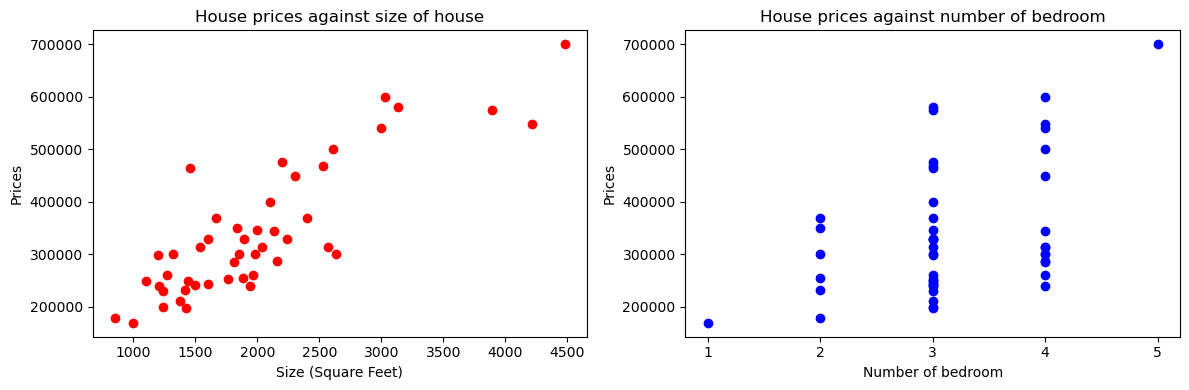

In [170]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(data[0],data[2],color="red")
axes[1].scatter(data[1],data[2],color="blue")

axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")

axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")
# Enhance layout
plt.tight_layout()

In [171]:
X = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples

In [172]:
X.head()

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


# Feature Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Our task here is to:

Subtract the mean value of each feature from the dataset.
After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [173]:
#feature normalisation function
def featureNorm(X):
    return (X-np.mean(X))/np.std(X)

In [174]:
X=featureNorm(X)

C:\Users\klikh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# adding the intercept term


In [175]:
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.1
iterations = 200
theta = np.zeros((3,1))
y = y[:,np.newaxis]

C:\Users\klikh\AppData\Local\Temp\ipykernel_11792\3461389228.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [176]:
#computing cost
def computeCostMultiVariate(X,y,theta):
    y_pred=np.dot(X,theta)
    mse=(y_pred-y)**2
    return (1/(2*m)) * np.sum(mse)
J=computeCostMultiVariate(X,y,theta)
print(" Cost = ",J)

 Cost =  65591548106.45744


# Optimal parameter by gradient descent algorithm

In [177]:
def gradientDescentMulti(X,y,theta,alpha,iterations):
    m=len(y)
    Jh_multi_linear=[]
    for i in range(iterations):
        y_pred=np.dot(X,theta)
        error=(y_pred-y)
        descent=np.dot(X.transpose(),error)
        theta-=(1/m) *alpha *descent
        Jh_multi_linear.append(computeCostMultiVariate(X,y,theta))
        
    return theta,Jh_multi_linear

theta, Jh_multi_linear=gradientDescentMulti(X,y,theta,alpha,iterations)

In [178]:
print(theta)
print("optimum cost valu is : ",Jh_multi_linear[-1])  #prints the last cost value
print("The optimum hypothesis is : h(x) =" + str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2)) + "x1"+str(round(theta[2,0],2))+"x2")

[[340412.6593343 ]
 [109440.63822766]
 [ -6571.19661218]]
optimum cost valu is :  2043280073.1502974
The optimum hypothesis is : h(x) =340412.66 + 109440.64x1-6571.2x2


these are the optimum theta values


In [179]:
#lets see the final cost over iterations
J=computeCostMultiVariate(X,y,theta)
print(J)

2043280073.1502974


## ploting the cost function w.r.t #iterations

Text(0.5, 1.0, 'Cost funtion optimization curve using graient descent')

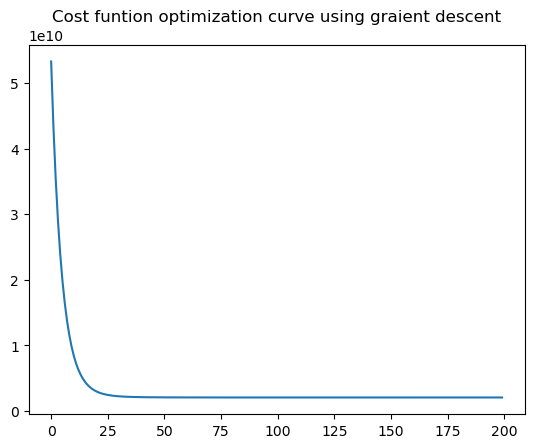

In [180]:
#plot the cost function vs iterations grap
plt.plot(Jh_multi_linear)
#plt.xlabel("iterations")
#plt.ylabel("$J(\Theta)$")
plt.title("Cost funtion optimization curve using graient descent")

In [181]:
#make predictions
def predict_house_price(feature,theta):
    y_pred=np.dot(theta.transpose(),feature)
    return y_pred
#feature normalisation of x values
x_sample = featureNorm(np.array([1650,3]))
x_sample=np.append(np.ones(1),x_sample)
predicted_price=predict_house_price(x_sample,theta)
print("Cost for new house having size 1650 and 3 bedrooms: ",predicted_price[0])
#print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))

Cost for new house having size 1650 and 3 bedrooms:  456424.49417414423


# Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

### Problem context

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("ex2data1.txt",header=None)

In [183]:
data=pd.read_csv("ex2data1.txt",header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [184]:
X=data.iloc[:,:2]
y=data.iloc[:,2]
X.head()

,0,1
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


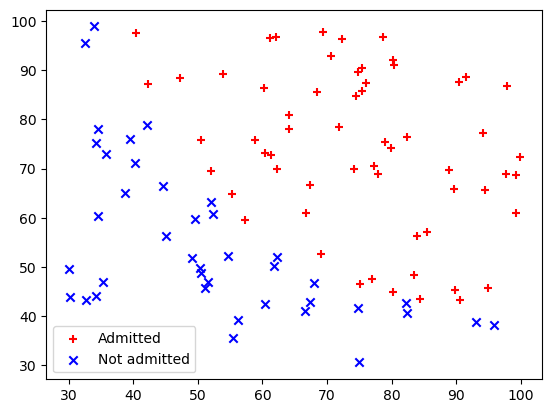

In [185]:
res=y==1
adm=plt.scatter(X[res][0].values,X[res][1].values,c="r",marker="+")
not_adm = plt.scatter(X[~res][0].values, X[~res][1].values,c="b",marker="x")
#plt.xlabel("Exam 1 score")
#plt.ylabel("Exam 2 score")
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))

# Sigmoid function
The hypothesis function that we have used in linear regression can't be used in logistic regression. Because that function may return values that are greater than one.In other words continuous values while we need catagorical result in logistic regression. Moreover, that function is not convex function. Thats why we take help from sigmoid function. Before move to further, lets implement the sigmoid function first

In [186]:
def sigmoid(x):
      return 1/(1+np.exp(-x))


# Cost Function

In [187]:
def cf_logistic(X,y,theta):
    m=len(y)
    z=np.dot(X,theta)
    y_pred=sigmoid(z)
    error=(-y * np.log(y_pred)) - ((1-y)*np.log(1-y_pred))
    cost=(1/m)*np.sum(error)
    grad=(1/m)*np.dot(X.transpose(),(y_pred-y))
    return cost,grad

### Setting initial parameter and test cost function


In [188]:
m,n=X.shape[0],X.shape[1]
X=np.append(np.ones((m,1)),X,axis=1)
y=y.values.reshape(m,1)
initial_theta=np.zeros((n+1,1))
cost,grad=cf_logistic(X,y,initial_theta)
print("cost for initial theta is : ", cost)
print("grad at initial theta is : ",grad)
print("initial theta is : ",initial_theta)

cost for initial theta is :  0.6931471805599453
grad at initial theta is :  [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
initial theta is :  [[0.]
 [0.]
 [0.]]


In [189]:
print("Unnormalized form of X : ", X[:5,])

Unnormalized form of X :  [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]


#### Before doing gradient descent algorithm we need to perform feature normalization

In [190]:
def featureNorm(X):
    return (X-np.mean(X))/np.std(X)

In [191]:
X=featureNorm(X)

In [192]:
#after normalization lets have a look on the data
print("Normalized X : ",X[:5,])

Normalized X :  [[-1.26237152 -0.28185018  0.98379548]
 [-1.26237152 -0.40832276 -0.01148269]
 [-1.26237152 -0.24616364  0.83441509]
 [-1.26237152  0.46349063  1.22536647]
 [-1.26237152  1.01319169  0.90563304]]


In [193]:
num_iter=1000
alpha=.5

As mentioned in the lecture, the gradient descent algorithm is very similar to linear regression. The only difference is that the hypothesis h(x) is now g(Θ^Tx) where g is the sigmoid function.

In [194]:
def gD_logistic(X,y,theta,alpha,num_iter):
    m=len(y)
    Jh_logistic=[]
    for i in range(num_iter):
        cost,grad=cf_logistic(X,y,theta)
        theta=theta-(alpha*grad)
        Jh_logistic.append(cost)
    return theta, Jh_logistic
    

In [195]:
optimized_theta,Jh_logistic=gD_logistic(X,y,initial_theta,alpha,num_iter)
print(optimized_theta)

[[4.48213443]
 [5.69132904]
 [5.50895331]]


In [196]:
print(Jh_logistic[-1])

0.20806000435638866


Text(0.5, 1.0, 'Cost funtion optimization curve using graient descent')

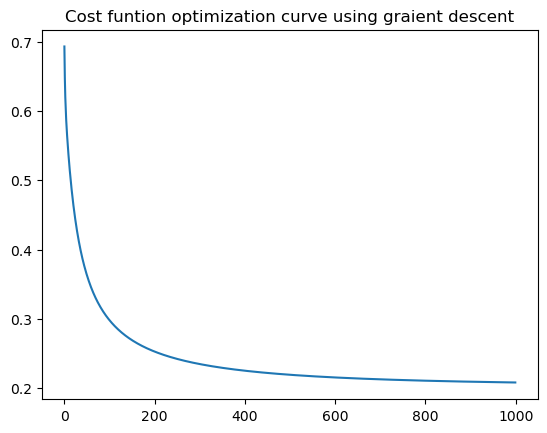

In [197]:
#plot the cost function vs iterations grap
plt.plot(Jh_logistic)
#plt.xlabel("iterations")
#plt.ylabel("$J(\Theta)$")
plt.title("Cost funtion optimization curve using graient descent")

 I tried different number of iterations and learning rate for this task. but so far this is the least when alpha=.5 and iterations =1000. and in the above curve we can see that error is plateau at 1000 iterations

# Ploting the decision boundary using optimized theta

In [198]:
print(optimized_theta)

[[4.48213443]
 [5.69132904]
 [5.50895331]]


In [199]:
print(optimized_theta.shape)

(3, 1)


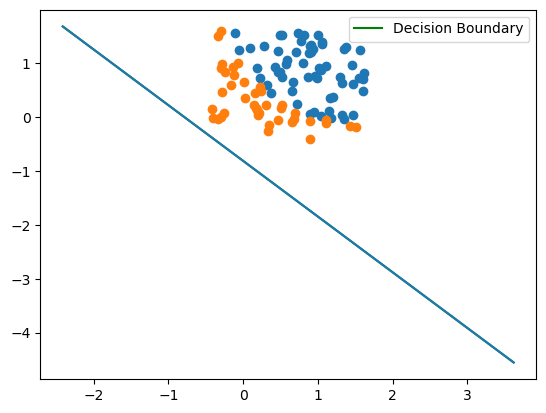

In [200]:

# Plot the decision boundary
plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
plot_y = (-1 / optimized_theta[2]) * (optimized_theta[1] * plot_x + optimized_theta[0])
plt.plot(plot_x, plot_y, c="g", label="Decision Boundary")


mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
# Set labels and legend
plt.legend()



# Accuracy 
lets check how our model is to predict

In [201]:
def lr_accuracy(X,y,theta,cutoff):
    pred=[sigmoid(np.dot(X,theta))>=cutoff]
    ac=np.mean(pred==y)
    print(ac*100,"%")
lr_accuracy(X,y,optimized_theta,.5)

89.0 %


89 percent is not that model. However we should do further work to increase 

# Predictions
lets predict for an unknown value

In [202]:
x_test = np.array([60,70])
x_test = np.append(np.ones(1),x_test)
x_test = featureNorm(x_test)
prob = sigmoid(x_test.dot(optimized_theta))
print("Student with scores 60 and 70, model predict an admission probability of",prob[0])

Student with scores 60 and 70, model predict an admission probability of 0.8230090915004592


## Regularized Logistic regression
You will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

# Import necessary library

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt    # more on this later

In [204]:
data = pd.read_csv('ex2data2.txt', header = None)
X = data.iloc[:,:-1]
y = data.iloc[:,2]
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [205]:
print(data.shape)
print(X.shape)
print(y.shape)
print(X[:1])

(118, 3)
(118, 2)
(118,)
          0        1
0  0.051267  0.69956


# Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

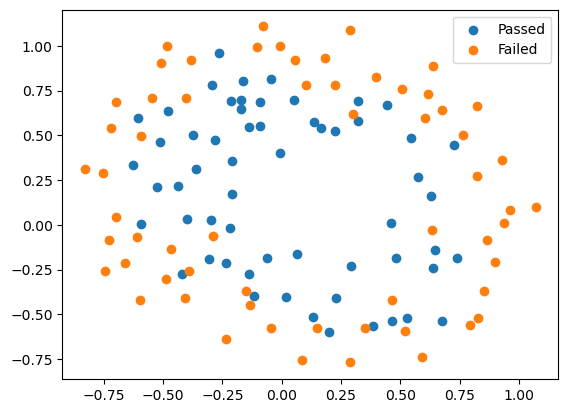

In [206]:
mask = y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

Plotting the data clearly shows that the decision boundary that separates the different classes is a non-linear one. This lead to the next step of feature mapping, where we add additional polynomial terms to try and better fit the data

# Feature Mapping and Adding intercept term
Refers to add more feature from the existing features.While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to over fitting

In [207]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))
    return out
X = mapFeature(X.iloc[:,0], X.iloc[:,1])

C:\Users\klikh\AppData\Local\Temp\ipykernel_11792\169329379.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))


# sigmoid

In [208]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Cost Funtion


In [209]:
# def cf_logisticR(X,y,theta,lam):
#     m=len(y)
#     y=y[:,np.newaxis]
#     z=np.dot(X,theta)
#     y_pred=sigmoid(z)
#     error = (-y * np.log( y_pred)) - ((1-y)*np.log(1- y_pred))
#     cost=(1/m)*np.sum(error)
#     regCost=cost+lam/(2*m)*np.sum(theta**2)
#     # compute gradient
#     grad=np.zeros((m,1))
#     grad=(1/m)*np.dot(X.transpose(),error)
#     grad[1:]=grad[1:]+(lam/m)*theta[1:]
#     return regCost,grad  
    
    
def costFunctionReg(theta, X, y ,Lambda):
    m=len(y)
    y=y[:,np.newaxis]
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta**2)

    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad


In [210]:
print(X[:1])

[[1.00000000e+00 5.12670000e-02 6.99560000e-01 2.62830529e-03
  3.58643425e-02 4.89384194e-01 1.34745327e-04 1.83865725e-03
  2.50892595e-02 3.42353606e-01 6.90798869e-06 9.42624411e-05
  1.28625106e-03 1.75514423e-02 2.39496889e-01 3.54151856e-07
  4.83255257e-06 6.59422333e-05 8.99809795e-04 1.22782870e-02
  1.67542444e-01 1.81563032e-08 2.47750473e-07 3.38066048e-06
  4.61305487e-05 6.29470940e-04 8.58939846e-03 1.17205992e-01]]


# setting initial parameters and check the cost function


In [211]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))
# Set regularization parameter lambda to 1
Lambda = 1

#initial theta
print("initial theta",theta[:3])
#Compute and display initial cost and gradient for regularized logistic regression
cost, grad=costFunctionReg(initial_theta, X, y, Lambda)
print("Cost at initial theta (zeros):",cost)

initial theta [[340412.6593343 ]
 [109440.63822766]
 [ -6571.19661218]]
Cost at initial theta (zeros): 0.6931471805599461


C:\Users\klikh\AppData\Local\Temp\ipykernel_11792\3419122384.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y=y[:,np.newaxis]


In [212]:
print("final X, y",X[:1],y[:1])
print("\n\n shape:",X.shape,y.shape)

final X, y [[1.00000000e+00 5.12670000e-02 6.99560000e-01 2.62830529e-03
  3.58643425e-02 4.89384194e-01 1.34745327e-04 1.83865725e-03
  2.50892595e-02 3.42353606e-01 6.90798869e-06 9.42624411e-05
  1.28625106e-03 1.75514423e-02 2.39496889e-01 3.54151856e-07
  4.83255257e-06 6.59422333e-05 8.99809795e-04 1.22782870e-02
  1.67542444e-01 1.81563032e-08 2.47750473e-07 3.38066048e-06
  4.61305487e-05 6.29470940e-04 8.58939846e-03 1.17205992e-01]] 0    1
Name: 2, dtype: int64


 shape: (118, 28) (118,)


In [213]:
print(J)

2043280073.1502974


In [214]:
print("initial grad",grad[:4])

initial grad [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]]


In [215]:
print("final X, y\n",X[:1],y[:1])
print("\n\n shape:",X.shape,y.shape)

final X, y
 [[1.00000000e+00 5.12670000e-02 6.99560000e-01 2.62830529e-03
  3.58643425e-02 4.89384194e-01 1.34745327e-04 1.83865725e-03
  2.50892595e-02 3.42353606e-01 6.90798869e-06 9.42624411e-05
  1.28625106e-03 1.75514423e-02 2.39496889e-01 3.54151856e-07
  4.83255257e-06 6.59422333e-05 8.99809795e-04 1.22782870e-02
  1.67542444e-01 1.81563032e-08 2.47750473e-07 3.38066048e-06
  4.61305487e-05 6.29470940e-04 8.58939846e-03 1.17205992e-01]] 0    1
Name: 2, dtype: int64


 shape: (118, 28) (118,)


#  Gradient Descent Alogrithm
mimizes cost function by fitting parameters thetas

In [216]:
num_iters=800
alpha=.2

In [217]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history
theta , J_history = gradientDescent(X,y,initial_theta,1,num_iters,0.2)
print("The regularized theta using ridge regression:\n",theta)

C:\Users\klikh\AppData\Local\Temp\ipykernel_11792\3419122384.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y=y[:,np.newaxis]


The regularized theta using ridge regression:
 [[ 2.25319932]
 [ 1.44552306]
 [ 2.33283911]
 [-3.57008233]
 [-2.35002884]
 [-3.07090829]
 [ 0.50119267]
 [-0.88407626]
 [-0.69606495]
 [-0.22204243]
 [-2.69560917]
 [ 0.04161168]
 [-1.31573798]
 [-0.80286232]
 [-2.23101395]
 [-0.39638083]
 [-0.43758167]
 [ 0.09476652]
 [-0.69300577]
 [-0.78996079]
 [-0.45416815]
 [-2.01051679]
 [ 0.16446857]
 [-0.59855483]
 [ 0.11471778]
 [-0.73960173]
 [-0.52044034]
 [-1.38532427]]


# ploting the cost function w.r.t number of iterations


Text(0.5, 1.0, 'Cost function using Gradient Descent')

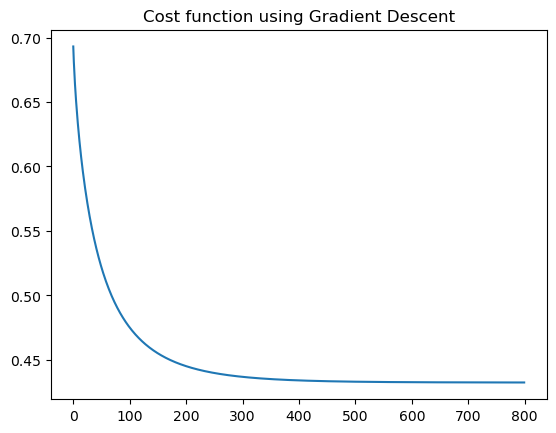

In [218]:
plt.plot(J_history)
plt.title("Cost function using Gradient Descent")

# Checking decrease of cost function

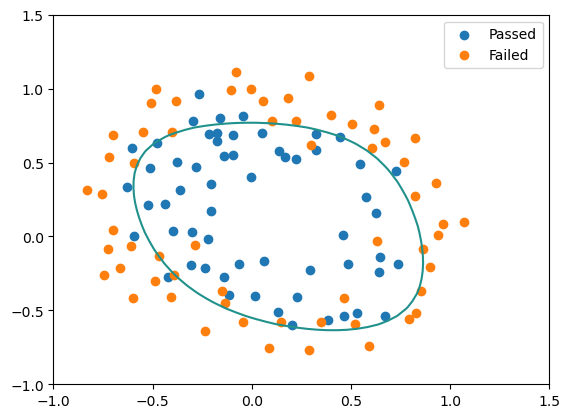

In [219]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
mask = y.values.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

In [220]:
# def classifierPredict(theta,X):
#     """
#     take in numpy array of theta and X and predict the class 
#     """
#     predictions = X.dot(theta)
    
#     return predictions>0
# p=classifierPredict(theta,X)
# print("Train Accuracy:", (sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")

# Digit recognition using logistic regression
This series of exercise make use of a handwritten digits dataset that consists of 5000 training examples, where each example is a 20 pixel by 20 pixel grayscale image of the digit.
# Understanding One-vs-all Classification
If there are K different classes in a data-set, we will first build a model where we consider the data belonging to one class as positive, and all other classes as negative. Next, we will build another model assuming the data belonging to some other class as positive and the remaining as negative. We shall keep repeating the process until we build K different models.
### In general, if there are K classes in the data-set, we need to build K different models.


In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
# Use loadmat to load matlab files
data=loadmat("ex3data1.mat")
X=data["X"]
y=data["y"]

In [222]:
X.shape, y.shape

((5000, 400), (5000, 1))

In [223]:
data.keys()
print(data["y"][:3])

[[10]
 [10]
 [10]]


# Visualising the data set

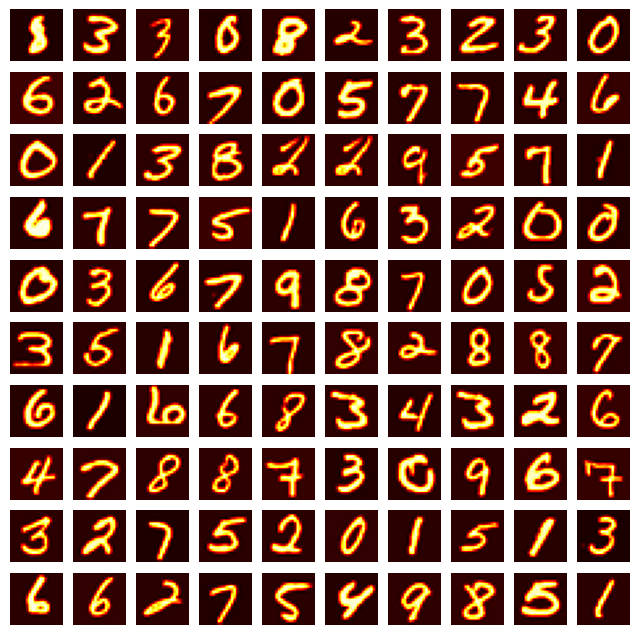

In [224]:
#visualising the data
import matplotlib.image as mpimg
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="hot") #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")

The code block above construct 100 subplots and randomly visualize 100 out of the 5000 training examples using plt.imshow. Take note we have to reshape the training example back to 20 X 20 pixel before we can visualize it and adding order="F" as a parameter into the reshape function ensure that the orientation of the image is upright.

In [225]:
# ## Adding the intercept term'
# m = len(y)
# ones = np.ones((m,1))
# X = np.hstack((ones, X)) #add the intercept
# (m,n) = X.shape

# Sigmoidd and cost function

In [226]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

def lrCostFunction(theta, X, y, Lambda):
    m=len(y)
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad


The code grad = np.vstack((j_0[:, np.newaxis], j_1)) is using the NumPy library to vertically stack two arrays together. j_0[:, np.newaxis] is a way to reshape j_0 into a column vector. It adds a new axis to j_0 using np.newaxis, resulting in a shape of (n, 1) where n is the length of j_0.



# Initializing the parameters 

In [229]:
# m,n=X.shape
# print(m,n)
# X_t=np.append(np.ones((m,1)),X,axis=1)
# y_t=y.reshape(m,1)
# theta_t=np.zeros((n+1,1))
# alpha=.1
# Lamda=1
# num_iters=400
# J,grad=lrCostFunction(theta_t,X_t,y_t,Lambda)
# print("Cost:",J,"Expected cost: 2.534819")

theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J, grad = lrCostFunction(theta_t, X_t, y_t, 3)
Lambda=1
num_iters=400
alpha=.1
print("Cost:",J,"Expected cost: 2.534819")
print("Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: 2.534819396109744 Expected cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [230]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = lrCostFunction(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history



In [231]:
optimized_theta,J_history=gradientDescent(X_t,y_t,theta_t,alpha,num_iters,Lambda)
print(optimized_theta)

[[0.06422841]
 [0.02683551]
 [0.08689855]
 [0.14665224]]


In [ ]:
def oneVsAll(X, y, num_labels, Lambda):
    m, n = X.shape[0], X.shape[1]
    initial_theta = np.zeros((n+1,1))
    all_theta = []
    all_J=[]
    # add intercept terms
    
    X = np.hstack((np.ones((m,1)),X))
    
    for i in range(1,num_labels+1):
        theta , J_history = gradientDescent(X,np.where(y==i,1,0),initial_theta,1,300,Lambda)
        all_theta.extend(theta)
        all_J.extend(J_history)
    return np.array(all_theta).reshape(num_labels,n+1), all_J

In [232]:
all_theta, all_J = oneVsAll(X, y, 10, 0.1)

In [239]:
print(all_theta[:4])

[[-3.41466417e-01  0.00000000e+00  0.00000000e+00 ...  7.53488100e-05
   2.12516707e-07  0.00000000e+00]
 [-1.45647255e+00  0.00000000e+00  0.00000000e+00 ...  5.93427964e-04
  -6.79593321e-05  0.00000000e+00]
 [-1.91272503e+00  0.00000000e+00  0.00000000e+00 ... -8.75484540e-06
   1.67249019e-07  0.00000000e+00]
 [-7.82030625e-01  0.00000000e+00  0.00000000e+00 ...  1.34536886e-05
   6.42575303e-07  0.00000000e+00]]


Text(0.5, 1.0, 'Cost function using Gradient Descent')

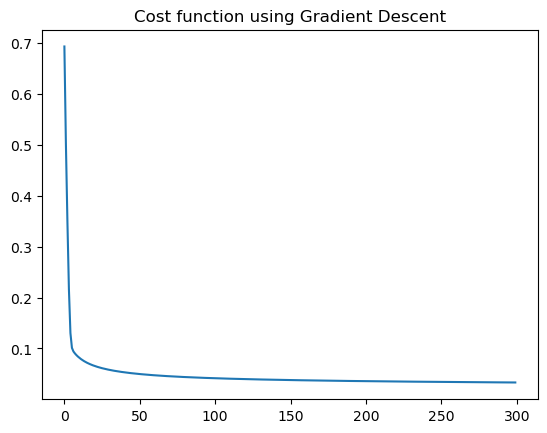

In [240]:
plt.plot(all_J[0:300])
# plt.xlabel("Iteration")
# plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

# prediction

In order to make a prediction, the probability of x(i) for each class was computed and the prediction is the class with the highest probability

In [243]:
def predictOneVsAll(all_theta, X):
    """
    Using all_theta, compute the probability of X(i) for each class and predict the label
    
    return a vector of prediction
    """
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    predictions = X @ all_theta.T
    return np.argmax(predictions,axis=1)+1

np.argmax(predictions, axis=1): This function returns the indices of the maximum values along a specified axis of the predictions array. Here, axis=1 indicates that the maximum values should be searched along the columns or the second dimension of the array.

+1: This operation adds 1 to the resulting indices obtained from np.argmax(). The purpose of this addition is to convert the zero-based indices to one-based indices. In many programming languages, including Python, indexing typically starts from 0. However, in certain contexts, such as class labels or categories, a one-based indexing convention may be used.

In [244]:
pred = predictOneVsAll(all_theta, X)
print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 91.46 %


# Neural Network
Finally, time for neural networks. With the same dataset, we aimed to achieve higher accuracy using a more complex algorithm such as the neural network. For the first part of the exercise, the optimized theta values were given to us and we are supposed to implement feedforward propagation to obtain the prediction and model accuracy. the theta values are given in ex3weights.mat file

In [248]:
mat2=loadmat("ex3weights.mat")
Theta1=mat2["Theta1"] # Theta1 has size 25 x 401
Theta2=mat2["Theta2"] # Theta2 has size 10 x 26

In [249]:
Theta1.shape,Theta2.shape

((25, 401), (10, 26))

shape of theta1(25,400): this means that number of feature is 400 in the input layer and 25 hidden units in the only hidden layer. Similarly the output layer is 10.

In [250]:
def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network
    """
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    a1 = sigmoid(X @ Theta1.T)
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(a1 @ Theta2.T) # output layer
    
    return np.argmax(a2,axis=1)+1

In [251]:
pred2 = predict(Theta1, Theta2, X)
print("Training Set Accuracy:",sum(pred2[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 97.52 %


# Neural Network from scratch


In [ ]:
def sigmoidGradient(z):
    """
    computes the gradient of the sigmoid function
    """
    sigmoid = 1/(1 + np.exp(-z))
    
    return sigmoid *(1-sigmoid)
def nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda):
    """
    nn_params contains the parameters unrolled into a vector
    
    compute the cost and gradient of the neural network
    """
    # Reshape nn_params back into the parameters Theta1 and Theta2
    Theta1 = nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
    
    m = X.shape[0]
    J=0
    X = np.hstack((np.ones((m,1)),X))
    y10 = np.zeros((m,num_labels))
    
    a1 = sigmoid(X @ Theta1.T)
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(a1 @ Theta2.T) # output layer
    
    for i in range(1,num_labels+1):
        y10[:,i-1][:,np.newaxis] = np.where(y==i,1,0)
    for j in range(num_labels):
        J = J + sum(-y10[:,j] * np.log(a2[:,j]) - (1-y10[:,j])*np.log(1-a2[:,j]))
    
    cost = 1/m* J
    reg_J = cost + Lambda/(2*m) * (np.sum(Theta1[:,1:]**2) + np.sum(Theta2[:,1:]**2))
    
    # Implement the backpropagation algorithm to compute the gradients
    
    grad1 = np.zeros((Theta1.shape))
    grad2 = np.zeros((Theta2.shape))
    
    for i in range(m):
        xi= X[i,:] # 1 X 401
        a1i = a1[i,:] # 1 X 26
        a2i =a2[i,:] # 1 X 10
        d2 = a2i - y10[i,:]
        d1 = Theta2.T @ d2.T * sigmoidGradient(np.hstack((1,xi @ Theta1.T)))
        grad1= grad1 + d1[1:][:,np.newaxis] @ xi[:,np.newaxis].T
        grad2 = grad2 + d2.T[:,np.newaxis] @ a1i[:,np.newaxis].T
        
    grad1 = 1/m * grad1
    grad2 = 1/m*grad2
    
    grad1_reg = grad1 + (Lambda/m) * np.hstack((np.zeros((Theta1.shape[0],1)),Theta1[:,1:]))
    grad2_reg = grad2 + (Lambda/m) * np.hstack((np.zeros((Theta2.shape[0],1)),Theta2[:,1:]))
    
    return cost, grad1, grad2,reg_J, grad1_reg,grad2_reg

In [ ]:
def sigmoidGradient(z):
    """
    computes the gradient of the sigmoid function
    """
    sigmoid = 1/(1 + np.exp(-z))
    
    return sigmoid *(1-sigmoid) 

In [ ]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10
nn_params = np.append(Theta1.flatten(),Theta2.flatten())
J,reg_J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 1)[0:4:3]
print("Cost at parameters (non-regularized):",J,"\nCost at parameters (Regularized):",reg_J)

# Random Initialization


In [ ]:
def randInitializeWeights(L_in, L_out):
    """
    randomly initializes the weights of a layer with L_in incoming connections and L_out outgoing connections.
    """
    
    epi = (6**1/2) / (L_in + L_out)**1/2
    
    W = np.random.rand(L_out,L_in +1) *(2*epi) -epi
    
    return W

In [ ]:
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
initial_nn_params = np.append(initial_Theta1.flatten(),initial_Theta2.flatten())

In [ ]:
debug_J  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 3)
print("Cost at (fixed) debugging parameters (w/ lambda = 3):",debug_J[3])

Learning parameters using Gradient Descent

In [ ]:
def gradientDescentnn(X,y,initial_nn_params,alpha,num_iters,Lambda,input_layer_size, hidden_layer_size, num_labels):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    Theta1 = initial_nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = initial_nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        nn_params = np.append(Theta1.flatten(),Theta2.flatten())
        cost, grad1, grad2 = nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda)[3:]
        Theta1 = Theta1 - (alpha * grad1)
        Theta2 = Theta2 - (alpha * grad2)
        J_history.append(cost)
    
    nn_paramsFinal = np.append(Theta1.flatten(),Theta2.flatten())
    return nn_paramsFinal , J_history

In [ ]:
nnTheta, nnJ_history = gradientDescentnn(X,y,initial_nn_params,0.8,800,1,input_layer_size, hidden_layer_size, num_labels)
Theta1 = nnTheta[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
Theta2 = nnTheta[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)

In [ ]:
pred3 = predict(Theta1, Theta2, X)
print("Training Set Accuracy:",sum(pred3[:,np.newaxis]==y)[0]/5000*100,"%")

# Support Vector Machine
There is two part in this assignment. First, we will implement Support Vector Machines (SVM) on several 2D data set to have an intuition of the algorithms and how it works. Next, we will use SVM on emails datasets to try and classify spam emails.

To load the dataset, loadmat from scipy.io is used to open the mat files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
mat = loadmat("ex6data1.mat")
X = mat["X"]
y = mat["y"]

# Plotting of the dataset

In [ ]:
m,n = X.shape[0],X.shape[1]
pos,neg= (y==1).reshape(m,1), (y==0).reshape(m,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

We start off with a simple dataset that has a clear linear boundary between the training examples.

As recommended in the lecture, we try not to code SVM from scratch but instead, make use of highly optimized library such as sklearn for this assignment.

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X,np.ravel(y))

Since this is a linear classification problem, we will not be using any kernel for this task. This is equivalent to using the linear kernel in SVC (note that the default kernel setting for SVC is “ rbf”, which stands for Radial basis function). The ravel() function here returns an array with size (m, ) which is required for SVC.

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)
# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

With the default setting of C = 1.0 (remember C = 1/λ), this is the decision boundary we obtained.

In [ ]:
# Test C = 100
classifier2 = SVC(C=100,kernel="linear")
classifier2.fit(X,np.ravel(y))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)
# plotting the decision boundary
X_3,X_4 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_3,X_4,classifier2.predict(np.array([X_3.ravel(),X_4.ravel()]).T).reshape(X_3.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

Changing C=100, gave a decision boundary that overfits the training examples.

Next, we will look at a dataset that could not be linearly separable. Here is where kernels come into play to provide us with the functionality of a non-linear classifier. For those having difficulties comprehending the concept of kernels, this article I found gave a pretty good intuition and some mathematics explanation about kernels. For this part of the assignment, we were required to complete the function gaussianKernel to aid in the implementation of SVM with Gaussian kernels. I will be skipping this step as SVC contain its own gaussian kernels implementation in the form of Radial basis function (rbf). Here is the Wikipedia page with the equation for rbf, as you can see, it is identical to the Gaussian kernel function from the course.

Loading and plotting of example dataset 2

In [ ]:
mat2 = loadmat("ex6data2.mat")
X2 = mat2["X"]
y2 = mat2["y"]
m2,n2 = X2.shape[0],X2.shape[1]
pos2,neg2= (y2==1).reshape(m2,1), (y2==0).reshape(m2,1)
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")
plt.xlim(0,1)
plt.ylim(0.4,1)

# To implement SVM with Gaussian kernels

In [ ]:
classifier3 = SVC(kernel="rbf",gamma=30)
classifier3.fit(X2,y2.ravel())

In regards to the parameters of SVM with rbf kernel, it uses gamma instead of sigma. The documentation of the parameters can be found here. I found that gamma is similar to 1/σ but not exactly, I hope some domain expert can give me insights into the interpretation of this gamma term. As for this dataset, I found that gamma value of 30 shows the most resemblance to the optimized parameters in the assignment (sigma was 0.1 in the course).

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")
# plotting the decision boundary
X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_5,X_6,classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape),1,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)


As for the last dataset in this part, we perform a simple hyperparameter tuning to determine the best C and gamma values to use.

Loading and plotting of examples dataset 3

In [ ]:
mat3 = loadmat("ex6data3.mat")
X3 = mat3["X"]
y3 = mat3["y"]
Xval = mat3["Xval"]
yval = mat3["yval"]
m3,n3 = X3.shape[0],X3.shape[1]
pos3,neg3= (y3==1).reshape(m3,1), (y3==0).reshape(m3,1)
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)

In [ ]:
def dataset3Params(X, y, Xval, yval,vals):
    """
    Returns your choice of C and sigma. You should complete this function to return the optimal C and 
    sigma based on a cross-validation set.
    """
    acc = 0
    best_c=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_c =C
                best_gamma=gamma
    return best_c, best_gamma

dataset3Params iterates through the list of vals given in the function and set C as vals and gamma as 1/vals. An SVC model is constructed using each combination of parameters and the accuracy of the validation set is computed. Based on the accuracy, the best model is chosen and the values for the respective C and gamma are returned.

In [ ]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = dataset3Params(X3, y3.ravel(), Xval, yval.ravel(),vals)
classifier4 = SVC(C=C,gamma=gamma)
classifier4.fit(X3,y3.ravel())

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)
# plotting the decision boundary
X_7,X_8 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
plt.contour(X_7,X_8,classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape),1,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)

The optimal values are 0.3 for C and 100 for gamma, this results in similar decision boundary as the assginment.

Moving on to spam email classification. This problem is unique as it focuses more on data preprocessing than the actual modeling process. The emails need to process in a way that that could be used as input for the model. One way of doing so is to obtain the indices of all the words in an email based on a list of commonly used vocabulary.

In [ ]:
import re
from nltk.stem import PorterStemmer
file_contents = open("emailSample1.txt","r").read()
vocabList = open("vocab.txt","r").read()

Vocabulary list and its respective indices were given, I had stored the list as a dictionary with the vocabs as keys and indices as values. You could probably do it another way but I want to make accessing the vocabs easier (eg. with if keys in dict)

In [ ]:
vocabList=vocabList.split("\n")[:-1]
vocabList_d={}
for ea in vocabList:
    value,key = ea.split("\t")[:]
    vocabList_d[key] = value

As for preprocessing the emails, several steps were outlined for us in the assignment.

In [ ]:
def processEmail(email_contents,vocabList_d):
    """
    Preprocesses the body of an email and returns a list of indices of the words contained in the email. 
    """
    # Lower case
    email_contents = email_contents.lower()
    
    # Handle numbers
    email_contents = re.sub("[0-9]+","number",email_contents)
    
    # Handle URLS
    email_contents = re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub("[^\s]+@[^\s]+","emailaddr",email_contents)
    
    # Handle $ sign
    email_contents = re.sub("[$]+","dollar",email_contents)
    
    # Strip all special characters
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents = email_contents.replace(str(char),"")
    email_contents = email_contents.replace("\n"," ")    
    
    # Stem the word
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(" ")]
    email_contents= " ".join(email_contents)
    
    # Process the email and return word_indices
    
    word_indices=[]
    
    for char in email_contents.split():
        if len(char) >1 and char in vocabList_d:
            word_indices.append(int(vocabList_d[char]))
    
    return word_indices
word_indices= processEmail(file_contents,vocabList_d)

The use of regular expression comes in very handy here, this tutorial by python guru can help you get started on re. The other useful library here is nlkt where the PorterStemmer() function helps with stemming the words. Another good tutorial here, this time by pythonprogramming.net.

After getting the indices of the words, we need to convert the indices into a features vector.

In [ ]:
def emailFeatures(word_indices, vocabList_d):
    """
    Takes in a word_indices vector and  produces a feature vector from the word indices. 
    """
    n = len(vocabList_d)
    
    features = np.zeros((n,1))
    
    for i in word_indices:
        features[i] =1
        
    return features
features = emailFeatures(word_indices,vocabList_d)
print("Length of feature vector: ",len(features))
print("Number of non-zero entries: ",np.sum(features))

The print statement will print: Length of feature vector: 1899 and Number of non-zero entries: 43.0 . This is slightly different from the assignment as you’re was captured as “you” and “re” in the assignment while my code identified it as “your”, resulting in lesser non-zero entries.

To train the SVM will be as simple as passing the features as input. However, this is only one training example and we will need more training data to train a classifier.

In [ ]:
spam_mat = loadmat("spamTrain.mat")
X_train =spam_mat["X"]
y_train = spam_mat["y"]

Training examples are given in spamTrain.mat to train our classifier while test examples are in spamTest.mat to determine our model generalizability.

In [ ]:
C =0.1
spam_svc = SVC(C=0.1,kernel ="linear")
spam_svc.fit(X_train,y_train.ravel())
print("Training Accuracy:",(spam_svc.score(X_train,y_train.ravel()))*100,"%")

In [ ]:
spam_mat_test = loadmat("spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test =spam_mat_test["ytest"]
spam_svc.predict(X_test)
print("Test Accuracy:",(spam_svc.score(X_test,y_test.ravel()))*100,"%")

To better understand our model, we could look at the weights of each word and figure out the words that are most predictive of a spam email.

In [ ]:
weights = spam_svc.coef_[0]
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1),weights.reshape(1899,1)))
df = pd.DataFrame(weights_col)
df.sort_values(by=[1],ascending = False,inplace=True)
predictors = []
idx=[]
for i in df[0][:15]:
    for keys, values in vocabList_d.items():
        if str(int(i)) == values:
            predictors.append(keys)
            idx.append(int(values))
print("Top predictors of spam:")
for _ in range(15):
    print(predictors[_],"\t\t",round(df[1][idx[_]-1],6))

# Unsupervised Learning
## Clustering
We will start by implementing the K-means algorithms. Since K-means is an iterative process that assigns trainig examples to theit closes centroids and then recomputing the centroids ,we need two functions that do just that

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
mat = loadmat("ex7data2.mat")
X = mat["X"]

findClosestCentroids find the closest centroids by evaluating the distance between the training example from each centroid and assign the centroid to the training example with the smallest distance.

In [ ]:
def findClosestCentroids(X, centroids):
    """
    Returns the closest centroids in idx for a dataset X where each row is a single example.
    """
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:] - centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx
# Select an initial set of centroids
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

np.argmin find the index with the smallest distance and assign it to the training example. +1 is used here to number the centroid from 1 instead of 0.

To compute the centroid means after the assignment, we sum up the training examples assigned to a particular centroid and divide by the number of examples in each centroid.

In [ ]:
def computeCentroids(X, idx, K):
    """
    returns the new centroids by computing the means of the data points assigned to each centroid.
    """
    m, n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:]+=X[i,:]
        count[index]+=1
    
    return centroids/count
centroids = computeCentroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Now to visualize the whole process, I created a subplot for each iteration of the algorithms to monitor the movement of the centroids and assignment of the training examples.

In [ ]:
def plotKmeans(X, centroids, idx, K, num_iters):
    """
    plots the data points with colors assigned to each centroid
    """
    m,n = X.shape[0],X.shape[1]
    
    fig, ax = plt.subplots(nrows=num_iters,ncols=1,figsize=(6,36))
    
    for i in range(num_iters):    
        # Visualisation of data
        color = "rgb"
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)
# visualize the new centroids
        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)
        
        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, centroids)
    
    plt.tight_layout()
m,n = X.shape[0],X.shape[1]
plotKmeans(X, initial_centroids,idx, K,10)

Since K-means algorithms do not always give the optimal solution, random initialization is important.

In [ ]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to beused in K-Means on the dataset X
    """
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1),:]
        
    return centroids
centroids = kMeansInitCentroids(X, K)
idx = findClosestCentroids(X, centroids)
plotKmeans(X, centroids,idx, K,10)

The code above will run the visualization again but with random initialization. You can run the code multiple times to see the impact of random initial centroids.

Now that we finish coding the algorithm, we can start implementing it with other datasets. In this exercise, we will use the algorithm to select 16 clusters to represent the image (down from thousands of colors) to compress the image.

In [ ]:
mat2 = loadmat("bird_small.mat")
A = mat2["A"]
# preprocess and reshape the image
X2 = (A/255).reshape(128*128,3)
def runKmeans(X, initial_centroids,num_iters,K):
    
    idx = findClosestCentroids(X, initial_centroids)
    
    for i in range(num_iters):
        
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)
# assign each training example to the nearest centroid
        idx = findClosestCentroids(X, initial_centroids)
    return centroids, idx

Now to run k-means algorithm on the dataset

In [ ]:
K2 = 16
num_iters = 10
initial_centroids2 = kMeansInitCentroids(X2, K2)
centroids2, idx2 = runKmeans(X2, initial_centroids2, num_iters,K2)
m2,n2 = X.shape[0],X.shape[1]
X2_recovered = X2.copy()
for i in range(1,K2+1):
    X2_recovered[(idx2==i).ravel(),:] = centroids2[i-1]
# Reshape the recovered image into proper dimensions
X2_recovered = X2_recovered.reshape(128,128,3)
# Display the image
import matplotlib.image as mpimg
fig, ax = plt.subplots(1,2)
ax[0].imshow(X2.reshape(128,128,3))
ax[1].imshow(X2_recovered)

This is a side-by-side comparison of the original image and the compressed image with only 16 colors.

# Dimensionality Reduction
### Motivation I: Data Compression
The next part of the assignment makes use of a 2D dataset to get intuition on the process of Principal Component Analysis (PCA) and then conduct PCA on a face image dataset to perform dimensionality reduction.

Load and visualize the 2D dataset


In [ ]:
mat3 = loadmat("ex7data1.mat")
X3 = mat3["X"]
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")

To implement the PCA algorithm, PCA also consists of two computational steps where we will code one of it to compute the covariance matrix and utilize numpy library for the other to obtain the eigenvectors.

Before that, feature normalization is needed to ensure that data are in the same range.

In [ ]:
def featureNormalize(X):
    """
    Returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.
    """
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X_norm = (X - mu)/sigma
    
    return X_norm, mu , sigma
def pca(X):
    """
    Computes eigenvectors of the covariance matrix of X
    """
    m,n = X.shape[0], X.shape[1]
    
    sigma = 1/m * X.T @ X
    
    U,S,V = svd(sigma)
    
    return U,S,V

np.linalg.svd is similar to svd function in matlab and return the same U,S,V matrices. The official documentation can be found here.

In [ ]:
from numpy.linalg import svd
X_norm,mu,std = featureNormalize(X3)
U,S = pca(X_norm)[:2]
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)
plt.xlim(-1,7)
plt.ylim(2,8)

The code block above implement PCA on the dataset and visualize the eigenvectors on the data. I found that Wikipedia has a good source of information for most of the learning algorithms and definitely worth looking if you wish to delve deeper into the algorithms.

In [ ]:
print("Top eigenvector U(:,1) =:",U[:,0])

To reduce the dimension of the dataset, we project the data onto the principal components (eigenvectors) found.

In [ ]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top k eigenvectors
    """
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))
    
    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
    
    return Z
# Project the data onto K=1 dimension
K=1
Z = projectData(X_norm, U, K)
print("Projection of the first example:",Z[0][0])

The print statement will print: Projection of the first example: 1.4963126084578515

Data also can be approximately reconstructed by projecting them back onto the original dimension space.

In [ ]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data
    """
    m,n = Z.shape[0],U.shape[0]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
    
    return X_rec
X_rec  = recoverData(Z, U, K)
print("Approximation of the first example:",X_rec[0,:])

The print statement will print: Approximation of the first example: [-1.05805279 -1.05805279]

To visualize the whole process,

In [ ]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()

Finally, we move on to a more complex dataset — Face image dataset. To load and visualize the data,

In [ ]:
mat4 = loadmat("ex7faces.mat")
X4 = mat4["X"]
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X4[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")

These images contain 32 X 32 pixels in grayscale, resulting in a dimension of 1,024 features and our task is to reduce the dimension to around 100 principal components that best describe our data.

In [ ]:
X_norm2 = featureNormalize(X4)[0]
# Run PCA
U2 =pca(X_norm2)[0]
#Visualize the top 36 eigenvectors found
U_reduced = U2[:,:36].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

Above is the visualization of 36 principal components that describe the largest variations in the dataset.

Next, we project the data onto the first 100 principal components, effectively reduce the dimension down to a hundred, recover the data and try to understand what is lost in the dimension reduction process.

In [ ]:
K2 = 100
Z2 = projectData(X_norm2, U2, K2)
print("The projected data Z has a size of:",Z2.shape)
# Data reconstruction
X_rec2  = recoverData(Z2, U2, K2)
# Visualize the reconstructed data
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_rec2[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")

# Anomaly Detection
In this part of the assignment, we will implement an anomaly detection algorithm using the Gaussian model to detect anomalous behavior in a 2D dataset first and then a high-dimensional dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
mat = loadmat("ex8data1.mat")
X = mat["X"]
Xval = mat["Xval"]
yval = mat["yval"]

In [ ]:
plt.scatter(X[:,0],X[:,1],marker="x")
plt.xlim(0,30)
plt.ylim(0,30)
# plt.xlabel("Latency (ms)")
# plt.ylabel("Throughput (mb/s)")

# To estimate parameters (mean and variance) for the Gaussian model

In [ ]:
def estimateGaussian(X):
    """
     This function estimates the parameters of a Gaussian distribution using the data in X
    """
    
    m = X.shape[0]
    
    #compute mean
    sum_ = np.sum(X,axis=0)
    mu = 1/m *sum_
    
    # compute variance
    var = 1/m * np.sum((X - mu)**2,axis=0)
    
    return mu,var
mu, sigma2 = estimateGaussian(X)

Multivariate Gaussian Distribution is an optional lecture in the course and the code to compute the probability density is given to us. However, in order for me to proceed on with the assignment, I need to write the multivariateGaussian function from scratch.

In [ ]:
def multivariateGaussian(X, mu, sigma2):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    k = len(mu)
    
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    return p
p = multivariateGaussian(X, mu, sigma2)

Some of the interesting functions we had utilized here are from numpy linear algebra class. The official documentation can be found here.

Once we estimate the Gaussian parameters and obtain the probability density of the data, we can visualize the fit.

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x")
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))
p2 = multivariateGaussian(np.hstack((X1.flatten()[:,np.newaxis],X2.flatten()[:,np.newaxis])), mu, sigma2)
contour_level = 10**np.array([np.arange(-20,0,3,dtype=np.float)]).T
plt.contour(X1,X2,p2[:,np.newaxis].reshape(X1.shape),contour_level)
plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

I had not explained the process of creating a contour plot before as most are quite straight forward. If you have difficulties following along, this article here might help. In simpler terms, we first create a meshgrid around the data region and compute the Z-axis. plt.contour then create the contour plot using the 3 axes (X, Y, Z).

# Now to select a threshold that will flag an example as anomalies.

In [ ]:
def selectThreshold(yval, pval):
    """
    Find the best threshold (epsilon) to use for selecting outliers
    """
    best_epi = 0
    best_F1 = 0
    
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",F1)

In case you have not noticed, F1 score is used here instead of accuracy as the dataset is highly unbalanced. To learn more about the various way to evaluate a machine learning’s model performance, this article sums up the topic quite well.

Visualizing the optimal threshold

In [ ]:
plt.figure(figsize=(8,6))
# plot the data
plt.scatter(X[:,0],X[:,1],marker="x")
# potting of contour
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))
p2 = multivariateGaussian(np.hstack((X1.flatten()[:,np.newaxis],X2.flatten()[:,np.newaxis])), mu, sigma2)
contour_level = 10**np.array([np.arange(-20,0,3,dtype=np.float)]).T
plt.contour(X1,X2,p2[:,np.newaxis].reshape(X1.shape),contour_level)
# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker ="o",facecolor="none",edgecolor="r",s=70)
plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

As for high dimensional dataset, we just have to follow the exact same steps as before

In [ ]:
mat2 = loadmat("ex8data2.mat")
X2 = mat2["X"]
Xval2 = mat2["Xval"]
yval2 = mat2["yval"]
# compute the mean and variance
mu2, sigma2_2 = estimateGaussian(X2)
# Training set
p3 = multivariateGaussian(X2, mu2, sigma2_2)
# cross-validation set
pval2 = multivariateGaussian(Xval2, mu2, sigma2_2)
# Find the best threshold
epsilon2, F1_2 = selectThreshold(yval2, pval2)
print("Best epsilon found using cross-validation:",epsilon2)
print("Best F1 on Cross Validation Set:",F1_2)
print("# Outliers found:",np.sum(p3<epsilon2))

#The second part of the assignment involved implementing a collaborative filtering algorithm to build a recommender system for movie ratings.

Loading and visualization of the movie ratings dataset

In [ ]:
mat3 = loadmat("ex8_movies.mat")
mat4 = loadmat("ex8_movieParams.mat")
Y = mat3["Y"] # 1682 X 943 matrix, containing ratings (1-5) of 1682 movies on 943 user
R = mat3["R"] # 1682 X 943 matrix, where R(i,j) = 1 if and only if user j give rating to movie i
X = mat4["X"] # 1682 X 10 matrix , num_movies X num_features matrix of movie features
Theta = mat4["Theta"] # 943 X 10 matrix, num_users X num_features matrix of user features
# Compute average rating 
print("Average rating for movie 1 (Toy Story):",np.sum(Y[0,:]*R[0,:])/np.sum(R[0,:]),"/5")

In [ ]:
plt.figure(figsize=(8,16))
plt.imshow(Y)
# plt.xlabel("Users")
# plt.ylabel("Movies")

Going into the algorithm proper, we start with computing the cost function and gradient

In [ ]:
def  cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda):
    """
    Returns the cost and gradient for the collaborative filtering problem
    """
    
    # Unfold the params
    X = params[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = params[num_movies*num_features:].reshape(num_users,num_features)
    
    predictions =  X @ Theta.T
    err = (predictions - Y)
    J = 1/2 * np.sum((err**2) * R)
    
    #compute regularized cost function
    reg_X =  Lambda/2 * np.sum(Theta**2)
    reg_Theta = Lambda/2 *np.sum(X**2)
    reg_J = J + reg_X + reg_Theta
    
    # Compute gradient
    X_grad = err*R @ Theta
    Theta_grad = (err*R).T @ X
    grad = np.append(X_grad.flatten(),Theta_grad.flatten())
    
    # Compute regularized gradient
    reg_X_grad = X_grad + Lambda*X
    reg_Theta_grad = Theta_grad + Lambda*Theta
    reg_grad = np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    
    return J, grad, reg_J, reg_grad

Similar to the previous approach, the assignment requires us to compute the cost function, gradient, regularized cost function and then regularized gradient in separate steps. The code block above will allows you to follow the assignment step by step as long as you use the correct indexing.

To test our cost function,

In [ ]:
# Reduce the data set size to run faster
num_users, num_movies, num_features = 4,5,3
X_test = X[:num_movies,:num_features]
Theta_test= Theta[:num_users,:num_features]
Y_test = Y[:num_movies,:num_users]
R_test = R[:num_movies,:num_users]
params = np.append(X_test.flatten(),Theta_test.flatten())
# Evaluate cost function
J, grad = cofiCostFunc(params, Y_test, R_test, num_users, num_movies, num_features, 0)[:2]
print("Cost at loaded parameters:",J)
J2, grad2 = cofiCostFunc(params, Y_test, R_test, num_users, num_movies, num_features, 1.5)[2:]
print("Cost at loaded parameters (lambda = 1.5):",J2)

Once we get our cost function and gradient going, we can start training our algorithm.

Loading of the movie list

In [ ]:
# load movie list
movieList = open("movie_ids.txt","r").read().split("\n")[:-1]
# see movie list
np.set_printoptions(threshold=np.nan)
movieList

You can enter your own movie preference at this step but I used the exact same ratings as the assignment to keep it consistent.

In [ ]:
# Initialize my ratings
my_ratings = np.zeros((1682,1))
# Create own ratings
my_ratings[0] = 4 
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[82]= 4
my_ratings[225] = 5
my_ratings[354]= 5
print("New user ratings:\n")
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print("Rated",int(my_ratings[i]),"for index",movieList[i])

To prepare our data before inputting into the algorithm, we need to normalize the ratings, set some random initial parameters, and use an optimizing algorithm to update the parameters.

In [ ]:
def normalizeRatings(Y, R):
    """
    normalized Y so that each movie has a rating of 0 on average, and returns the mean rating in Ymean.
    """
    
    m,n = Y.shape[0], Y.shape[1]
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))
    
    for i in range(m):
        Ymean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
        Ynorm[i,R[i,:]==1] = Y[i,R[i,:]==1] - Ymean[i]
        
    return Ynorm, Ymean
def gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,alpha,num_iters,Lambda):
    """
    Optimize X and Theta
    """
    # unfold the parameters
    X = initial_parameters[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = initial_parameters[num_movies*num_features:].reshape(num_users,num_features)
    
    J_history =[]
    
    for i in range(num_iters):
        params = np.append(X.flatten(),Theta.flatten())
        cost, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda)[2:]
        
        # unfold grad
        X_grad = grad[:num_movies*num_features].reshape(num_movies,num_features)
        Theta_grad = grad[num_movies*num_features:].reshape(num_users,num_features)
        X = X - (alpha * X_grad)
        Theta = Theta - (alpha * Theta_grad)
        J_history.append(cost)
    
    paramsFinal = np.append(X.flatten(),Theta.flatten())
    return paramsFinal , J_history

Once again, I chose batch gradient descent as my optimizing algorithm. One thing going through all the programming assignment in python taught me is that you would rarely go wrong with gradient descent. At this point, the code for gradient descent should be fairly familiar to you.

In [ ]:
Y = np.hstack((my_ratings,Y))
R =np.hstack((my_ratings!=0,R))
# Normalize Ratings
Ynorm, Ymean = normalizeRatings(Y, R)
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10
# Set initial Parameters (Theta,X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.append(X.flatten(),Theta.flatten())
Lambda = 10
# Optimize parameters using Gradient Descent
paramsFinal, J_history = gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,0.001,400,Lambda)

Plotting of cost function to ensure gradient descent is working

In [ ]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

To make predictions on movies that you had not rated

In [ ]:
# unfold paramaters
X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)
# Predict rating
p = X @ Theta.T
my_predictions = p[:,0][:,np.newaxis] + Ymean
import pandas as pd
df = pd.DataFrame(np.hstack((my_predictions,np.array(movieList)[:,np.newaxis])))
df.sort_values(by=[0],ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)
print("Top recommendations for you:\n")
for i in range(10):
    print("Predicting rating",round(float(df[0][i]),1)," for index",df[1][i])